# KNN Sebagai Klasifikasi Indeks Pembangunan Manusia

**Mengimport library yang dibutuhkan**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

**Load Dataset**

In [3]:
data = pd.read_csv('ipm.csv')
data.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal


**Data Exploration**

In [4]:
data.tail()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High
2195,12.91,11059,8.17,71.20,High


In [5]:
data['IPM'].value_counts()

Normal       1128
High          829
Very-High     146
Low            93
Name: IPM, dtype: int64

In [6]:
data.shape

(2196, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Harapan_Lama_Sekolah,2196.0,12.931498,1.312967,2.95,12.35,12.860,13.5700,17.80
Pengeluaran_Perkapita,2196.0,10323.144353,2664.738311,3975.00,8599.75,10192.500,11670.5000,23888.00
Rerata_Lama_Sekolah,2196.0,8.291585,1.611256,0.85,7.39,8.180,9.1800,12.83
Usia_Harapan_Hidup,2196.0,69.467418,3.437536,54.82,67.21,69.785,71.7125,77.73


In [9]:
data['IPM'].unique()

array(['High', 'Normal', 'Very-High', 'Low'], dtype=object)

In [10]:
data.columns

Index(['Harapan_Lama_Sekolah', 'Pengeluaran_Perkapita', 'Rerata_Lama_Sekolah',
       'Usia_Harapan_Hidup', 'IPM'],
      dtype='object')

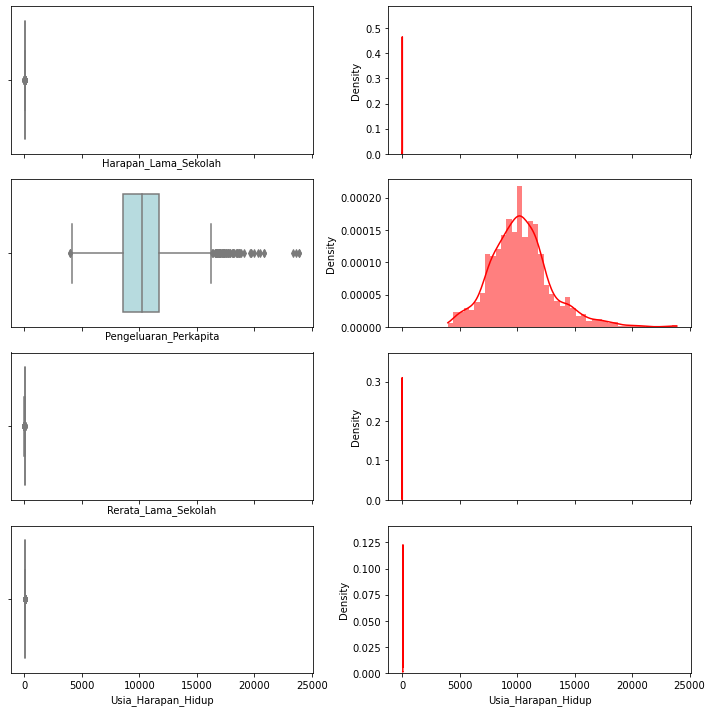

In [11]:
# Setting up subplots
f,axes=plt.subplots(ncols=2,nrows=4,figsize=(10,10),sharex=True)
l=['Harapan_Lama_Sekolah', 'Pengeluaran_Perkapita', 'Rerata_Lama_Sekolah', 'Usia_Harapan_Hidup','IPM']
for i in range(4):
    
    #Ploting the boxplot
    sns.boxplot(x = data.loc[:,l[i]], ax=axes[i][0], color='powderblue')
    
    # Ploting the KDE
    sns.histplot(data=data.loc[:,l[i]], color="red", kde=True, stat="density", linewidth=0, ax=axes[i][1])  
    
    plt.tight_layout()

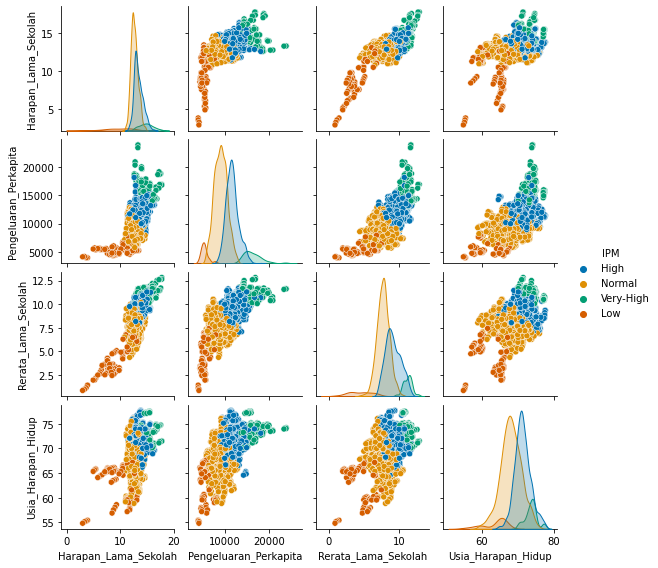

In [12]:
sns.pairplot(data, hue="IPM", height=2, palette= 'colorblind')

Insight 
1. Harapan lama sekolah
   <ol>IPM kategori Very High berkisar di nilai 15</ol>
   <ol>IPM kategori High berkisar di nilai 15</ol>
   <ol>IPM kategori normal berkisar di nilai rentang 10-15</ol>
   <ol>IPM kategori low berkisar di nilai 0-10</ol>
   Pada harapan lama sekolah inim data sudah terdistribusi secara normal
2. Pengeluaran Perkapita
   <ol>IPM kategori Very High berkisar di nilai >20000</ol>
   <ol>IPM kategori High berkisar di nilai 15000-2000</ol>
   <ol>IPM kategori Normal berkisar di nilai 5000-10000</ol>
   <ol>IPM kategori low berkisar di nilai 5000</ol>
3. Rerata Lama Sekolah 
   <ol>IPM kategori Very High berkisar di nilai  >12.5</ol>
   <ol>IPM kategori High berkisar di nilai 10</ol>
   <ol>IPM kategori normal berkisar di nilai 5-10</ol>
   <ol>IPM kategori Low berkisar di nilai 2.5-5</ol>
4. Usia Harapan Hidup
   <ol>IPM kategori Very high berkisar di nilai >= 75</ol>
   <ol>IPM kategori High berkisar di nilai 65-75</ol>
   <ol>IPM kategori Normal berkisar di nilai 60-75</ol>
   <ol>IPM kategori Low berkisar di nilai 0-60</ol>

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.9% of the points cann

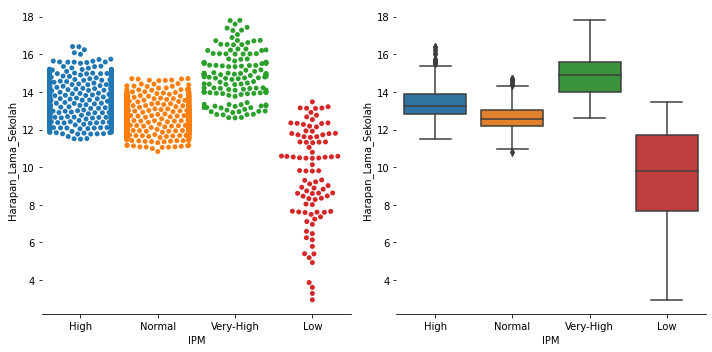

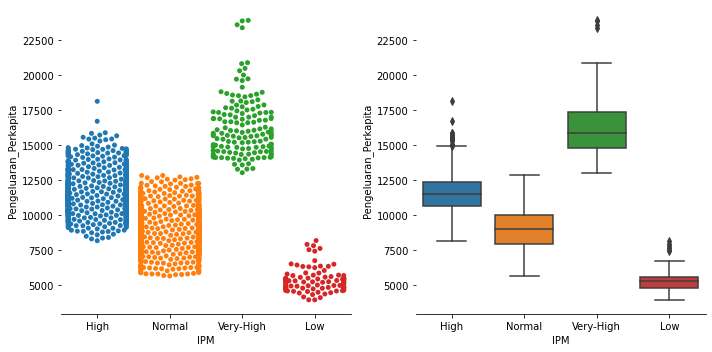

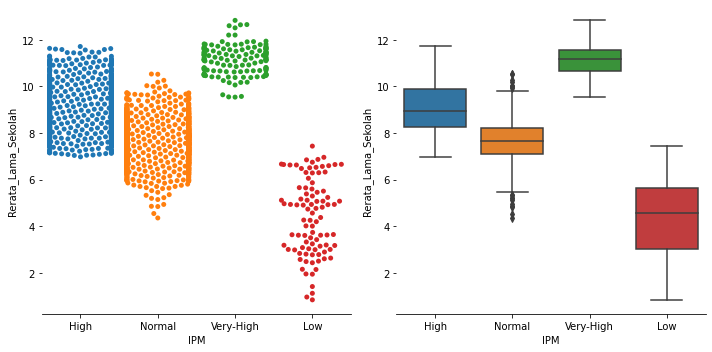

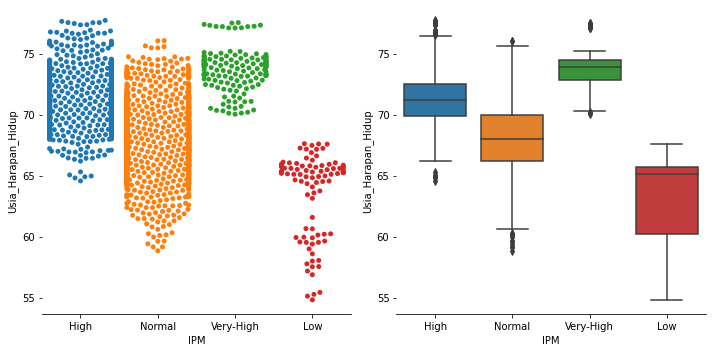

In [13]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.swarmplot(x=data['IPM'], y=data['Harapan_Lama_Sekolah'], ax=axes[0])

# Plot the Boxplot
sns.boxplot(x=data['IPM'], y=data['Harapan_Lama_Sekolah'], ax=axes[1])

plt.tight_layout()

###Pengeluaran Perkapita########
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)
# Plot the Swarmplot
sns.swarmplot(x=data['IPM'], y=data['Pengeluaran_Perkapita'], ax=axes[0])
# Plot te Boxplot
sns.boxplot(x=data['IPM'], y=data['Pengeluaran_Perkapita'], ax=axes[1])
plt.tight_layout()

###Rerata Lama Sekolah###

# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)
# Plot the Swarmplot
sns.swarmplot(x=data['IPM'], y=data['Rerata_Lama_Sekolah'], ax=axes[0])
# Plot the Boxplot
sns.boxplot(x=data['IPM'], y=data['Rerata_Lama_Sekolah'], ax=axes[1])
plt.tight_layout()


### USIA HARAPAN HIDUP ###
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)
# Plot the Swarmplot
sns.swarmplot(x=data['IPM'], y=data['Usia_Harapan_Hidup'], ax=axes[0])
# Plot the Boxplot
sns.boxplot(x=data['IPM'], y=data['Usia_Harapan_Hidup'], ax=axes[1])
plt.tight_layout()


<b> Insights </b>

1. Harapan Lama Sekolah
    <ol>Pada harapan lama sekolah, kategori very-high menempati posisi terbanyak, disusul dengan angka indeks IPM pendidikan kategori High dan yang terendah adalah kategori Low. Hal ini menandakan bahwa penduduk memiliki harapn untuk mengenyam pendidikan setingi-tingginya</ol>

2. Pengeluaran Perkapita
<ol>Pendapatan perkapita normal yang memiliki nilai paling tinggi </ol>

3. Rerata Lama Sekolah 
<ol>Rerata Lama sekolah normal</ol>

4. Usia Harapan Hidup 
<ol>Angka harapan hidup berkisar di kategori Normal</ol>

<AxesSubplot:>

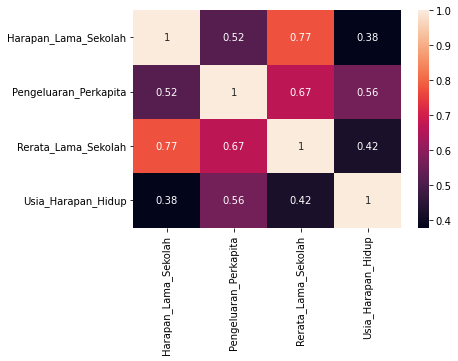

In [14]:
sns.heatmap(data.corr(), annot=True)

Pada grafik heatmap, terlihat beberapa fitur-fitur yang berkorelasi di variabel IPM, 
<ol>Harapan_Lama_Sekolah memiliki korelasi 64%</ol>
<ol>Pengeluaran_Perkapita memiliki korelasi 82%</ol>
<ol>Rerata_Lama_Sekolah memiliki korelasi 77%</ol>
<ol>Usia_Harapan_Hidup memiliki korelasi 64%</ol>

<b>Modelling</b>

In [15]:
data['IPM'] = data['IPM'].replace({'Low':0, 'Normal':1, 'High':2, 'Very-High':3})
data['IPM'] = data['IPM'].astype('float64')

In [16]:
data.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,2.0
1,13.90,7148,9.48,65.28,1.0
2,14.32,8776,8.68,67.43,1.0
3,14.60,8180,8.88,64.40,1.0
4,14.01,8030,9.67,68.22,1.0


In [17]:
data.isnull().sum()

Harapan_Lama_Sekolah     0
Pengeluaran_Perkapita    0
Rerata_Lama_Sekolah      0
Usia_Harapan_Hidup       0
IPM                      0
dtype: int64

In [18]:
# memisahkan data x dan y
x = data.drop(columns='IPM')
y = data['IPM']

In [19]:
# splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [20]:
# Modelling dengan KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [21]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [22]:
y_pred = knn.predict(x_test)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82        25
         1.0       0.84      0.82      0.83       212
         2.0       0.76      0.82      0.79       170
         3.0       0.84      0.82      0.83        33

    accuracy                           0.81       440
   macro avg       0.85      0.79      0.82       440
weighted avg       0.82      0.81      0.81       440



Akurasi yang didapatkan : 81%

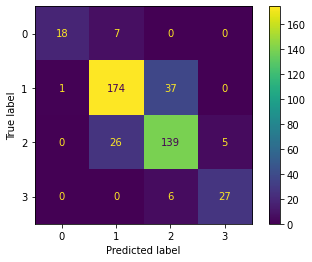

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

Pada confusion matrix, terlihat bahwa kategori normal (1) terklasifikasi lebih banyak dibanding yang lainnya, disusul dengan kategori IPM High, very high serta low 

In [30]:
print(cm)

[[ 18   7   0   0]
 [  1 174  37   0]
 [  0  26 139   5]
 [  0   0   6  27]]
